<a href="https://colab.research.google.com/github/KILjungjoon/Project_Asian_Parliament/blob/main/TW_SemtimetalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install cnsenti

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 395 kB 4.9 MB/s 


In [3]:
!pip install chinese-converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 190 kB 4.7 MB/s 


In [5]:
# 2019년과 2020년 회의날짜 리스트
date2019=['LCEWC03_090701.txt', 'LCEWC03_090702.txt', 'LCEWC03_090703.txt', 'LCEWC03_090704.txt', 'LCEWC03_090705.txt', 'LCEWC03_090706.txt', 'LCEWC03_090707.txt', 'LCEWC03_090708.txt', 'LCEWC03_090709.txt', 'LCEWC03_090710.txt', 'LCEWC03_090711.txt', 'LCEWC03_090712.txt', 'LCEWC03_090713.txt', 'LCEWC03_090714.txt', 'LCEWC03_090715.txt', 'LCEWC03_090716.txt', 'LCEWC03_090802.txt', 'LCEWC03_090803.txt', 'LCEWC03_090804.txt', 'LCEWC03_090805.txt', 'LCEWC03_090806.txt', 'LCEWC03_090807.txt', 'LCEWC03_090808.txt', 'LCEWC03_090810.txt', 'LCEWC03_090811.txt', 'LCEWC03_090812.txt', 'LCEWC03_090813.txt', 'LCEWC03_090815.txt']
date2020=['LCEWC03_100101.txt', 'LCEWC03_100102.txt', 'LCEWC03_100103.txt', 'LCEWC03_100104.txt', 'LCEWC03_100105.txt', 'LCEWC03_100106.txt', 'LCEWC03_100107.txt', 'LCEWC03_100108.txt', 'LCEWC03_100109.txt', 'LCEWC03_100110.txt', 'LCEWC03_100111.txt', 'LCEWC03_100112.txt', 'LCEWC03_100113.txt', 'LCEWC03_100114.txt', 'LCEWC03_100115.txt', 'LCEWC03_100201.txt', 'LCEWC03_100202.txt', 'LCEWC03_100203.txt', 'LCEWC03_100204.txt', 'LCEWC03_100206.txt', 'LCEWC03_100207.txt', 'LCEWC03_100208.txt', 'LCEWC03_100209.txt', 'LCEWC03_100210.txt', 'LCEWC03_100211.txt']

In [8]:
import pandas as pd
TOTAL2020=[]
for date in date2020 :
  text=open('/content/drive/MyDrive/★Project_prof.Jang/Taiwan/data/'+date+'', encoding='utf-8-sig').read()
  TOTAL2020.append(text)
alltext2020=' '.join(TOTAL2020)
f=open('/content/drive/MyDrive/★Project_prof.Jang/Taiwan/data/alltext2020.txt', 'w', encoding='utf-8')
f.write(alltext2020)
f.close()

import chinese_converter
text_simple=chinese_converter.to_simplified(alltext2020)

In [9]:
import chinese_converter
from cnsenti import Emotion
emotion = Emotion()
result = emotion.emotion_count(text_simple)
print(result)

from cnsenti import Sentiment
senti = Sentiment()
result1 = senti.sentiment_count(text_simple)
print('sentiment_count',result1)

{'words': 165389, 'sentences': 5790, '好': 5015, '乐': 994, '哀': 586, '怒': 98, '惧': 522, '恶': 2618, '惊': 36}
sentiment_count {'words': 165389, 'sentences': 5789, 'pos': 7039, 'neg': 6618}


{'words': 149789, 'sentences': 5350, '好': 4929, '乐': 969, '哀': 519, '怒': 27, '惧': 280, '恶': 2252, '惊': 33}
sentiment_count {'words': 149789, 'sentences': 5349, 'pos': 7226, 'neg': 5197}
---
* '惊''怒''惧''哀''乐''恶''好'
* (好good, 乐happy, 哀sad, 怒angry, 惧fear, 恶disgust, 惊shock)


In [23]:
import pandas as pd

data = [[2019,2019,2019,2019,2019,2019,2019,2019,2019,2020,2020,2020,2020,2020,2020,2020,2020,2020,],
        ['shock', 'angry', 'fear', 'sad', 'happy', 'disgust', 'good','negative','positive','shock', 'angry', 'fear', 'sad', 'happy', 'disgust', 'good','negative','positive'],
        [33,27,280,519,969,2252,4929,5197,7226,36,98,522,586,994,2618,5015,6618,7039]]

rows = zip(data[0], data[1], data[2])
headers = ['year', 'sentiment', 'value']
df = pd.DataFrame(list(rows), columns=headers)
df

,year,sentiment,value
0,2019,shock,33
1,2019,angry,27
2,2019,fear,280
3,2019,sad,519
4,2019,happy,969
5,2019,disgust,2252
6,2019,good,4929
7,2019,negative,5197
8,2019,positive,7226
9,2020,shock,36


In [26]:
# 표준화하였다. 2019는 149789로 나누고, 2020은 165389로 나눠준다.
df['stnd_value']=[0.000220, 0.000180, 0.001869, 0.003465, 0.006469, 0.015034, 0.032906, 0.034695, 0.048241, 0.000218, 0.000593, 0.003156, 0.003543, 0.006010, 0.015829, 0.030322, 0.040015, 0.042560]
df

,year,sentiment,value,stnd_value
0,2019,shock,33,0.000220
1,2019,angry,27,0.000180
2,2019,fear,280,0.001869
3,2019,sad,519,0.003465
4,2019,happy,969,0.006469
5,2019,disgust,2252,0.015034
6,2019,good,4929,0.032906
7,2019,negative,5197,0.034695
8,2019,positive,7226,0.048241
9,2020,shock,36,0.000218


In [27]:
# 피벗테이블 만들기
pivot_df = df.pivot(index='year', columns='sentiment', values='stnd_value')
pivot_df = pivot_df[['shock', 'angry', 'fear', 'sad', 'happy', 'disgust', 'good','negative','positive']].copy()
pivot_df

sentiment,shock,angry,fear,sad,happy,disgust,good,negative,positive
year,,,,,,,,,
2019,0.000220,0.000180,0.001869,0.003465,0.006469,0.015034,0.032906,0.034695,0.048241
2020,0.000218,0.000593,0.003156,0.003543,0.006010,0.015829,0.030322,0.040015,0.042560


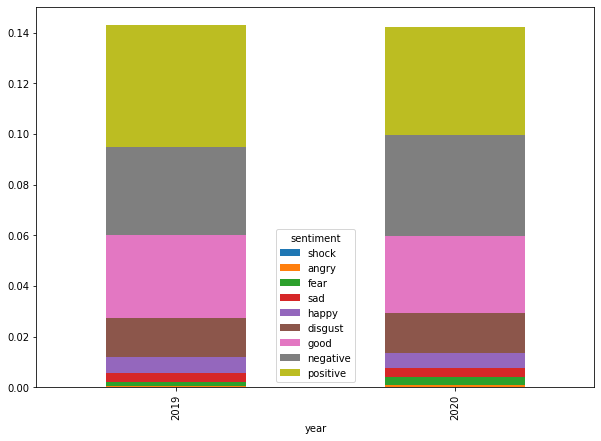

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

# Stacked Bar Chart
pivot_df.plot.bar(stacked=True, figsize=(10,7))